**1.Import Required Libraries**


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

**2. Load & Prepare the Dataset**

In [3]:
# Load the dataset
df = pd.read_csv('/content/BostonHousing.csv')

In [4]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
# Separate the input features (X) and target variable (y)
X = df.drop(columns=['medv']) # Drop medv column
y = df['medv'] # Target column

In [9]:
X.head(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10


In [10]:
y.head(10)

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
5,28.7
6,22.9
7,27.1
8,16.5
9,18.9


**3. Data Preprocessing**

In [12]:
# Check for missing values
print(df.isnull().sum())

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


In [14]:
# Normalize the numerical features
# from sklearn.preprocessing import StandardScaler
# Identifying numerical features
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

In [15]:
# Normalizing the numerical features
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [16]:
# Check the transformed dataset
print(df.head())

       crim        zn     indus      chas       nox        rm       age  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

        dis       rad       tax   ptratio         b     lstat      medv  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [18]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,0.159686
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,-0.101524
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,1.324247
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,1.182758
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,1.487503


**4. Model Implementation**

In [19]:
# Linear Regression (From Scratch)
class LinearRegression:
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X, y):
        # Add a column of ones for the intercept term (bias)
        X = np.c_[np.ones(X.shape[0]), X]

        # Compute the coefficients using the Normal Equation
        X_transpose = X.T
        self.coef_ = np.linalg.inv(X_transpose.dot(X)).dot(X_transpose).dot(y)
        self.intercept_ = self.coef_[0]
        self.coef_ = self.coef_[1:]

    def predict(self, X):
        # Make predictions
        return X.dot(self.coef_) + self.intercept_

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)

# Calculate RMSE and R² for model evaluation
from sklearn.metrics import mean_squared_error, r2_score

rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression RMSE: {rmse_lr}")
print(f"Linear Regression R²: {r2_lr}")

Linear Regression RMSE: 4.928602182665757
Linear Regression R²: 0.6687594935355755


In [33]:
# Random Forest (From Scratch)
from sklearn.tree import DecisionTreeRegressor

class RandomForest:
    def __init__(self, n_estimators=100):
        self.n_estimators = n_estimators
        self.trees = []

    def fit(self, X, y):
        for _ in range(self.n_estimators):
            # Bootstrap sampling: random sample with replacement
            X_sample, y_sample = self._bootstrap_sample(X, y)
            tree = DecisionTreeRegressor(max_depth=5)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def _bootstrap_sample(self, X, y):
        n_samples = X.shape[0]
        indices = np.random.choice(n_samples, size=n_samples, replace=True)
        return X.iloc[indices], y.iloc[indices]

    def predict(self, X):
        # Aggregate predictions from all trees
        predictions = np.zeros((X.shape[0], self.n_estimators))
        for i, tree in enumerate(self.trees):
            predictions[:, i] = tree.predict(X)
        return np.mean(predictions, axis=1)

# Train and evaluate Random Forest
rf_model = RandomForest(n_estimators=100)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Calculate RMSE and R² for model evaluation
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest RMSE: {rmse_rf}")
print(f"Random Forest R²: {r2_rf}")

Random Forest RMSE: 2.9313689091476496
Random Forest R²: 0.8828244867344215


In [36]:
# XGBoost (From Scratch)
class XGBoost:
    def __init__(self, n_estimators=100, learning_rate=0.1):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.trees = []

    def fit(self, X, y):
        # Initialize residuals as the target variable
        residuals = y.copy()

        for _ in range(self.n_estimators):
            # Fit a regression tree to the residuals
            tree = DecisionTreeRegressor(max_depth=5)
            tree.fit(X, residuals)
            self.trees.append(tree)

            # Update the residuals by subtracting the predictions from the current residuals
            predictions = tree.predict(X)
            residuals -= self.learning_rate * predictions

    def predict(self, X):
        predictions = np.zeros(X.shape[0])
        for tree in self.trees:
            predictions += self.learning_rate * tree.predict(X)
        return predictions

# Train and evaluate XGBoost
xgb_model = XGBoost(n_estimators=100, learning_rate=0.1)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Calculate RMSE and R² for model evaluation
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost RMSE: {rmse_xgb}")
print(f"XGBoost R²: {r2_xgb}")

XGBoost RMSE: 2.27834899213315
XGBoost R²: 0.9292157869640271


**5. Models' Comparison using RMSE and R²**

In [22]:
# Initialize results dictionary to store metrics for all models
results = {
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost'],
    'RMSE': [rmse_lr, rmse_rf, rmse_xgb],
    'R²': [r2_lr, r2_rf, r2_xgb]
}

In [24]:
# Convert the dictionary into a pandas DataFrame for better visualization
results_df = pd.DataFrame(results)

# Display
print(results_df)

               Model      RMSE        R²
0  Linear Regression  4.928602  0.668759
1      Random Forest  3.167981  0.863145
2            XGBoost  2.287503  0.928646


In [25]:
results_df.head()

,Model,RMSE,R²
0,Linear Regression,4.928602,0.668759
1,Random Forest,3.167981,0.863145
2,XGBoost,2.287503,0.928646


**6.Visualizing the Comparison**

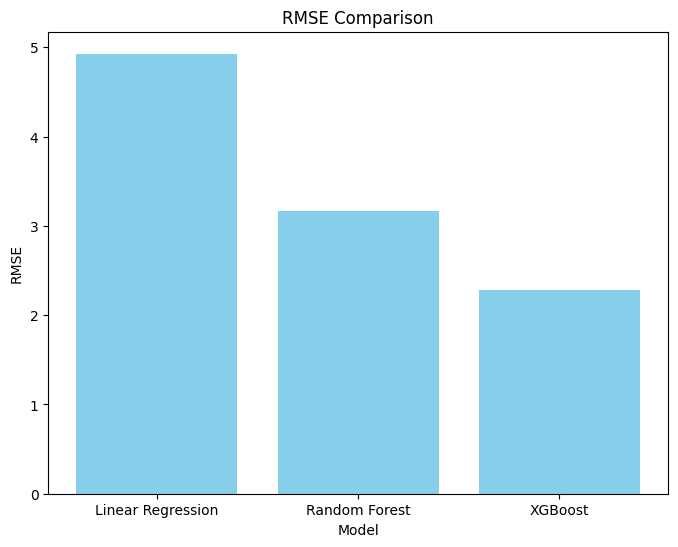

In [28]:
# Plotting the comparison of RMSE for all models

# Create a figure and axis for plotting
fig, axes = plt.subplots(1, 1, figsize=(8, 6))

# Using Bar plot for RMSE comparison
axes.bar(results_df['Model'], results_df['RMSE'], color='skyblue')
axes.set_title('RMSE Comparison')
axes.set_xlabel('Model')
axes.set_ylabel('RMSE')

# Display the plot
plt.show()

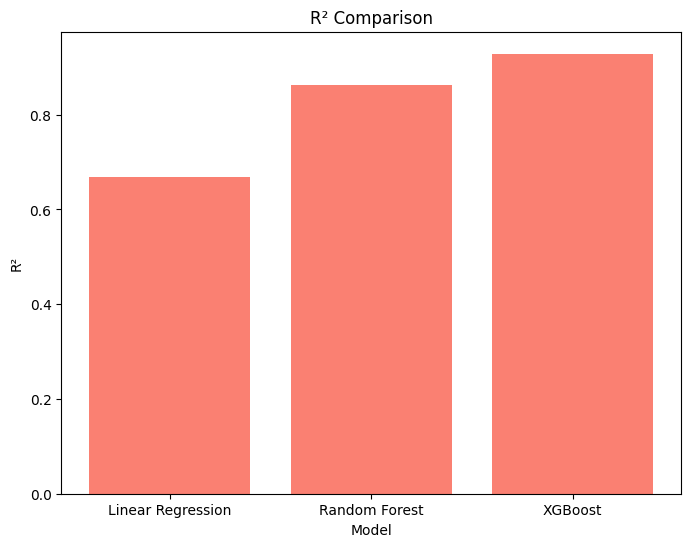

In [29]:
# Plotting the comparison of R² for all models

# Create a figure and axis for plotting
fig, axes = plt.subplots(1, 1, figsize=(8, 6))

# Bar plot for R² comparison
axes.bar(results_df['Model'], results_df['R²'], color='salmon')
axes.set_title('R² Comparison')
axes.set_xlabel('Model')
axes.set_ylabel('R²')

# Display the plot
plt.show()

**7. Visualize the Feature Importance for tree-based models (Random Forest and XGBoost)**

In [34]:
def compute_rf_feature_importance(model, feature_names):
    importances = np.zeros(len(feature_names))

    for tree in model.trees:
        importances += tree.feature_importances_

    importances /= len(model.trees)
    return importances

# Get feature importances
feature_names = X_train.columns
feature_importance_rf = compute_rf_feature_importance(rf_model, feature_names)

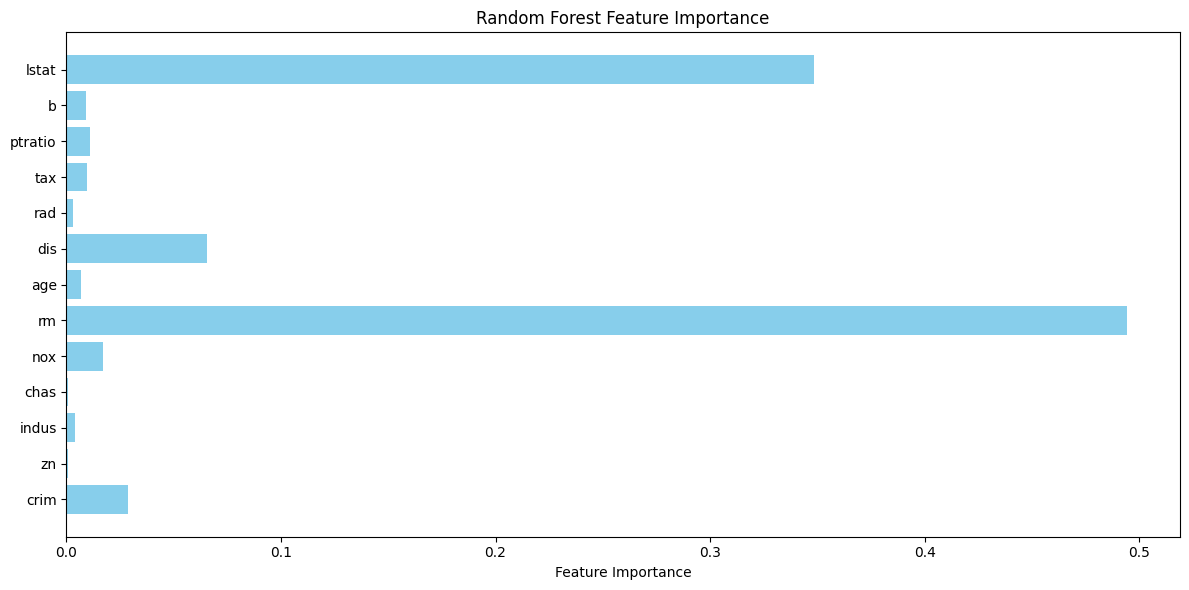

In [35]:
# Visualize
plt.figure(figsize=(12, 6))
plt.barh(feature_names, feature_importance_rf, color='skyblue')
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.tight_layout()
plt.show()

In [37]:
# Compute feature importances from all trees in XGBoost Model
def compute_xgb_feature_importance(model, feature_names):
    importances = np.zeros(len(feature_names))

    for tree in model.trees:
        importances += tree.feature_importances_

    importances /= len(model.trees)
    return importances

# Get feature importances
feature_names = X_train.columns
feature_importance_xgb = compute_xgb_feature_importance(xgb_model, feature_names)

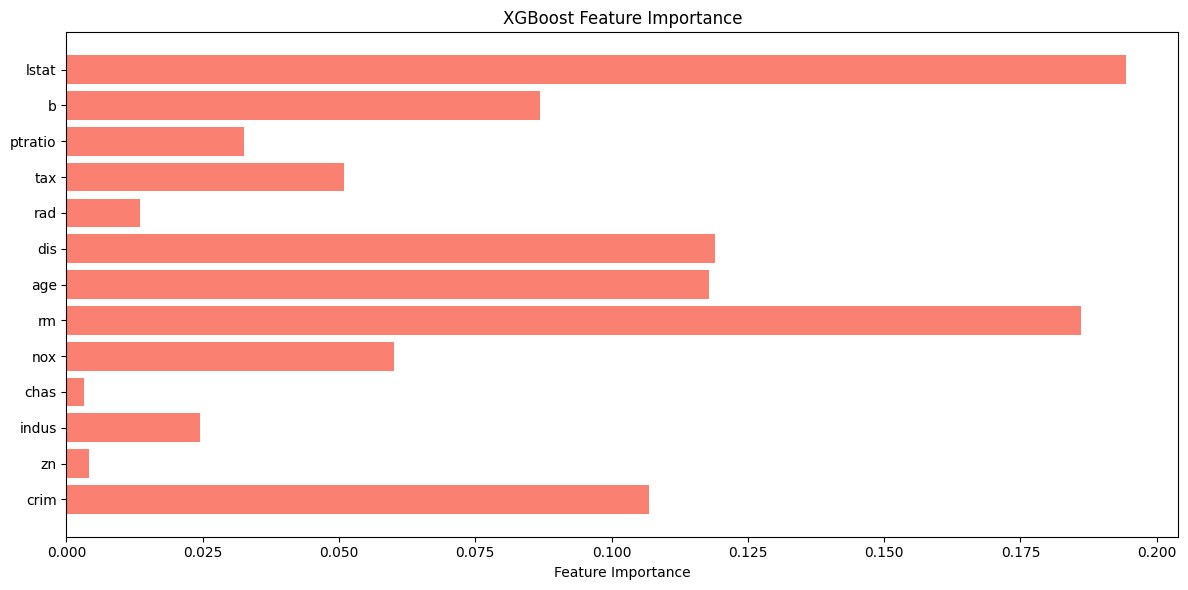

In [38]:
# Visualize
plt.figure(figsize=(12, 6))
plt.barh(feature_names, feature_importance_xgb, color='salmon')
plt.xlabel("Feature Importance")
plt.title("XGBoost Feature Importance")
plt.tight_layout()
plt.show()

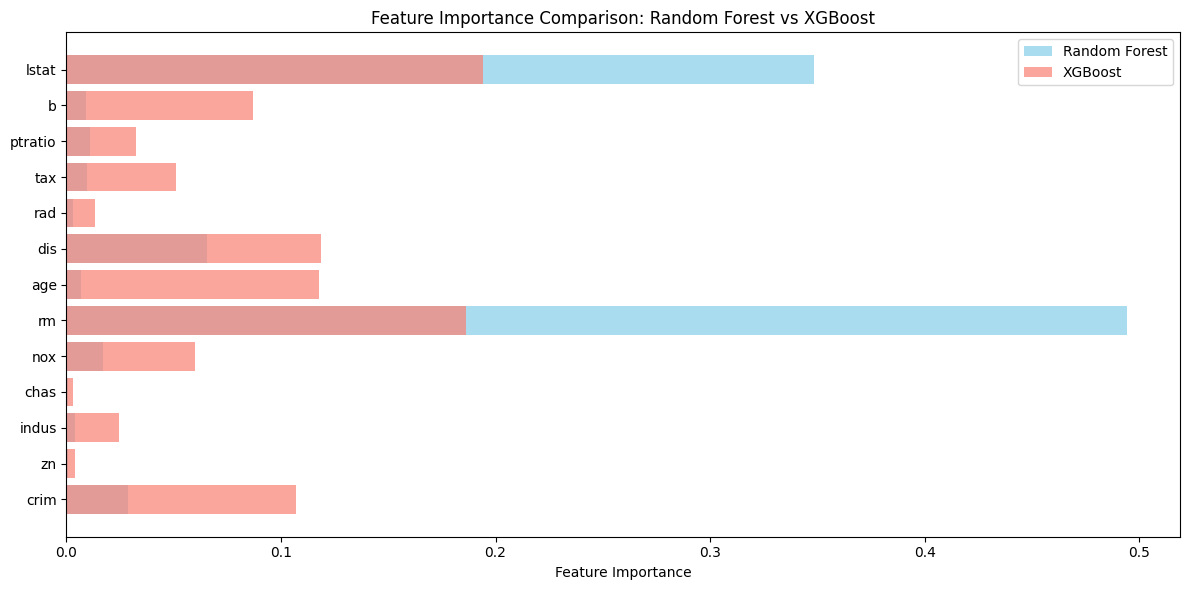

In [39]:
# Compare Random Forest and XGBoost

plt.figure(figsize=(12, 6))
plt.barh(feature_names, feature_importance_rf, color='skyblue', label='Random Forest', alpha=0.7)
plt.barh(feature_names, feature_importance_xgb, color='salmon', label='XGBoost', alpha=0.7)
plt.xlabel("Feature Importance")
plt.title("Feature Importance Comparison: Random Forest vs XGBoost")
plt.legend()
plt.tight_layout()
plt.show()